##Creating decision boundaries for classification data


In [ ]:
import tensorflow as tf
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#make 1000 examples
n_samples=1000

#create moons
x,y=make_moons(n_samples,noise=0.1,random_state=1)

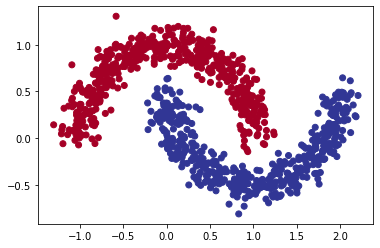

In [ ]:
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)
plt.show()

In [ ]:
import pandas as pd
pd.Series(y).value_counts()

1    500
0    500
dtype: int64

##create a model

In [ ]:
tf.random.set_seed(1)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation="relu"),

    #Adding dropout layer to achieve less variance
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(60,activation="relu"),

    #Adding dropout layer
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation="sigmoid") 
    #output layer with sigmoid activation function
])
#compile the model

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

#fit the model

model.fit(x,y,epochs=50)

Epoch 1/50
32/32 [==============================] - 1s 4ms/step - loss: 0.6154 - accuracy: 0.6870
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4697 - accuracy: 0.8280
Epoch 3/50
32/32 [==============================] - 0s 3ms/step - loss: 0.3639 - accuracy: 0.8360
Epoch 4/50
32/32 [==============================] - 0s 3ms/step - loss: 0.3094 - accuracy: 0.8720
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2909 - accuracy: 0.8680
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2816 - accuracy: 0.8710
Epoch 7/50
32/32 [==============================] - 0s 4ms/step - loss: 0.2706 - accuracy: 0.8830
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2606 - accuracy: 0.8890
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2451 - accuracy: 0.8900
Epoch 10/50
32/32 [==============================] - 0s 4ms/step - loss: 0.2439 - accuracy: 0.8910
Epoch 11/50
32/32 [

In [ ]:
model.evaluate(x,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 0.9940


[0.019746514037251472, 0.9940000176429749]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                150       
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 60)                3060      
                                                                 
 dropout_1 (Dropout)         (None, 60)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 61        
                                                                 
Total params: 3,271
Trainable params: 3,271
Non-trainable params: 0
_________________________________________________________________


###Create a function to visualize the Decision Boundaries

In [ ]:
def decision_boundary(model,x,y):
  x_min,x_max=x[:,0].min() - 0.2,x[:,0].max() + 0.2
  y_min,y_max=x[:,1].min() - 0.2,x[:,1].max() + 0.2
  #create a mesh gird
  xx,yy= np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))
  x_in=np.c_[xx.ravel(),yy.ravel()]

  #predict x_in using the model
  y_pred=model.predict(x_in)

  #This is a binary classification problem
  y_pred=np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx,yy,y_pred,alpha=0.5,cmap=plt.cm.RdYlBu)
  plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)

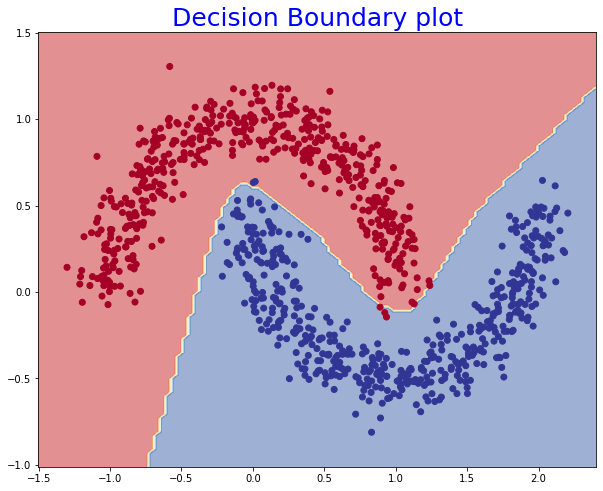

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Decision Boundary plot",fontsize=25,color="blue")
decision_boundary(model,x,y)